# Motivation
1. Visualization is important. 
2. Multitude of packages and syntaxes:
   1. Matplotlib 
   1. Matplotlib MATLAB-style (pyplot, `plt.scatter()`)
   2. Matplotlib Object Oriented style (`ax.scatter()`)
   3. Matplotlib DataFrame backend (Pandas, Dask,...)
   4. Seaborn. 
   5. Plotly Express style.
   6. Plotly Grap-Object style. 
   7. Plotly DataFrame backend. 
   8. Bokeh.
   9. Bokeh DataFrame backend. 
   10. Holoviews. 
   11. Holoviews DataFrame backend. 
   12. Altair
   13. Altair DataFrame backend. 
3. ... harder to understanding StackOverflow. 
4. ... harder for statistical code completion engines. 


# Preliminaries

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
# %pip install plotly
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
# %pip install dask
import dask.dataframe as dd
# %pip install holoviews
import holoviews as hv
# %pip install hvplot
import hvplot as hvplt
# %pip install bokeh
import bokeh as bk
# %pip install altair
import altair as alt


# Make data

In [3]:

n = 100 
x = np.random.rand(n, 1)
y = np.random.rand(n, 1)
z = np.random.rand(n, 1)
cat = np.random.randint(0, 3, n)

data_array = np.concatenate((x,y), axis=1)
data_frame = pd.concat([
    pd.DataFrame(data_array, columns=['x', 'y']),
    pd.DataFrame(z, columns=['z']),
    pd.DataFrame(cat, columns=['cat'])], 
    axis=1)
data_frame.head()

,x,y,z,cat
0,0.613538,0.306363,0.347654,2
1,0.608514,0.651699,0.006620,2
2,0.999435,0.381422,0.743469,1
3,0.780527,0.285458,0.932566,1
4,0.514729,0.021485,0.741165,0


# Matplotlib

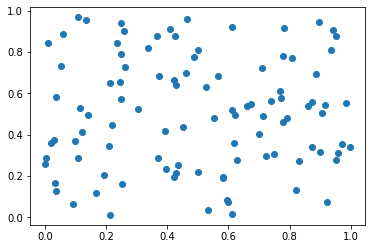

In [194]:
## Scatter of two 1D arrays
fig, ax = plt.subplots()
ax.scatter(x=x, y=y) # update axes object
# ax.get_figure() # display figure

In [195]:
## Inspect objects
type(ax)
ax?

type(fig)
fig?


Type:           Figure
String form:    Figure(432x288)
File:           /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/figure.py
Docstring:     
The top level container for all the plot elements.

The Figure instance supports callbacks through a *callbacks* attribute
which is a `.CallbackRegistry` instance.  The events you can connect to
are 'dpi_changed', and the callback will be called with ``func(fig)`` where
fig is the `Figure` instance.

Attributes
----------
patch
    The `.Rectangle` instance representing the figure background patch.

suppressComposite
    For multiple images, the figure will make composite images
    depending on the renderer option_image_nocomposite function.  If
    *suppressComposite* is a boolean, this will override the renderer.
Init docstring:
Parameters
----------
figsize : 2-tuple of floats, default: :rc:`figure.figsize`
    Figure dimension ``(width, height)`` in inches.

dpi : float, default: :rc:`figure.dpi`
 

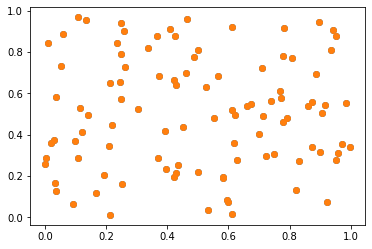

In [196]:
## Scatter of a DataFrame 
ax.scatter(data = data_frame, x = 'x', y = 'y')
ax.get_figure()

[Text(0.5, 0, 'XXX'), Text(0, 0.5, 'YYY')]

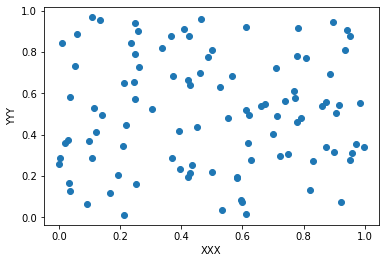

In [197]:
## Scatter of numpy array
# Use pandas DataFrame instead of np.array

# Set titles
ax.set_title("Blah blah blah")
ax.set_xlabel("XXX")
ax.set_ylabel("YYY")
ax.get_figure() 

# Warning: will not compund
fig, ax = plt.subplots()
ax.scatter(x=x, y=y) 
# ax.set_xlabel("XXX").set_ylabel("YYY") # will not work
ax.set(xlabel="XXX", ylabel="YYY") # will work
# ax.get_figure()

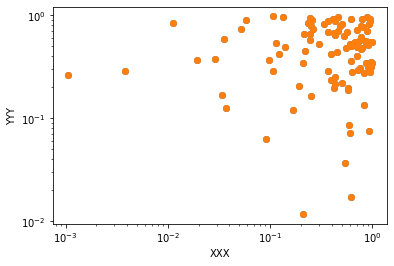

In [198]:
## Log scale
ax.scatter(x=x, y=y) 
ax.set_xscale('log') 
ax.set_yscale('log') 
ax.get_figure()

[None, None]

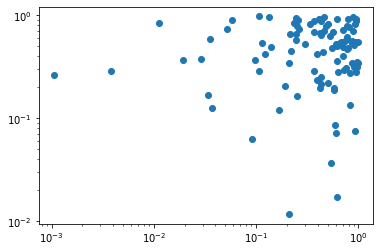

In [199]:
fig, ax = plt.subplots()
ax.scatter(x=x, y=y) 
ax.set(xscale= 'log', yscale= 'log')
# ax.get_figure()

# Also: Do not confuse log *scale* with log *transform*

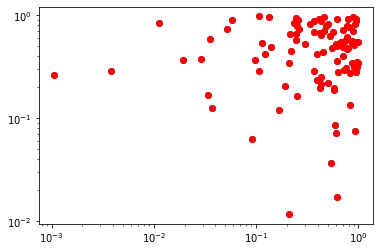

In [200]:
## Color markers
ax.scatter(x=x, y=y, color='red') # update axes object
ax.get_figure() # display figure

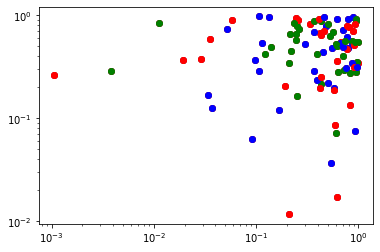

In [201]:
## Color markers along categorical variable 
colors = np.random.choice(['red', 'green', 'blue'], n)

for i in range(len(x)):
    ax.scatter(x[i], y[i], color=colors[i])
ax.get_figure()

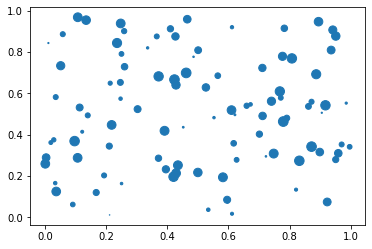

In [202]:
## Scale markers along numerical variable
fig, ax = plt.subplots()
ax.scatter(x=x, y=y, s=z*1e2) 
# ax.get_figure()

In [203]:
## Faceted scatterplot along categorical variable
# Do I really want to do it with Matplotlib?
#TODO

In [204]:
## Setting markers 
ax.scatter(x=x, y=y, marker='v') 
ax.get_figure()

# Get list of markers
from matplotlib.lines import Line2D
print(Line2D.markers)

{'.': 'point', ',': 'pixel', 'o': 'circle', 'v': 'triangle_down', '^': 'triangle_up', '<': 'triangle_left', '>': 'triangle_right', '1': 'tri_down', '2': 'tri_up', '3': 'tri_left', '4': 'tri_right', '8': 'octagon', 's': 'square', 'p': 'pentagon', '*': 'star', 'h': 'hexagon1', 'H': 'hexagon2', '+': 'plus', 'x': 'x', 'D': 'diamond', 'd': 'thin_diamond', '|': 'vline', '_': 'hline', 'P': 'plus_filled', 'X': 'x_filled', 0: 'tickleft', 1: 'tickright', 2: 'tickup', 3: 'tickdown', 4: 'caretleft', 5: 'caretright', 6: 'caretup', 7: 'caretdown', 8: 'caretleftbase', 9: 'caretrightbase', 10: 'caretupbase', 11: 'caretdownbase', 'None': 'nothing', None: 'nothing', ' ': 'nothing', '': 'nothing'}


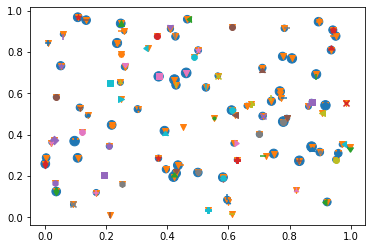

In [205]:
## Setting markers along categorical variable
marker = np.random.choice(list(Line2D.markers.keys()), n)
for i in range(len(x)):
    ax.scatter(x[i], y[i], marker=marker[i])
ax.get_figure()

(0.0, 0.5)

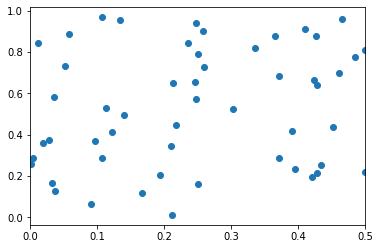

In [206]:
## Setting axis limits
fig, ax = plt.subplots()
ax.scatter(x=x, y=y) 
ax.set_xlim(0, 0.5)
# ax.get_figure()

/var/folders/_r/wy12vfvn5tl4x489t0smqbkm0000gn/T/ipykernel_10202/1613115856.py:3: UserWarning:

Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.



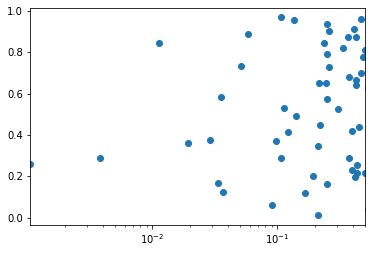

In [207]:
# Compounding axes operations
ax.set_xscale('log')
ax.set_xlim(0, 0.5)
ax.get_figure()

/var/folders/_r/wy12vfvn5tl4x489t0smqbkm0000gn/T/ipykernel_10202/2994466365.py:3: UserWarning:

Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.



[None, (0.0007484507734608961, 0.5)]

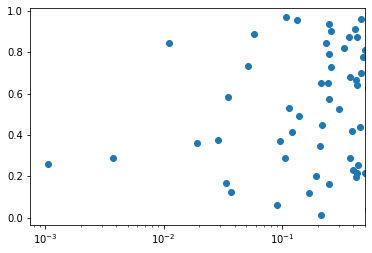

In [208]:
fig, ax = plt.subplots()
ax.scatter(x=x, y=y) 
ax.set(xscale='log', xlim=(0, 0.5))
# ax.get_figure()
# Avaialble options in https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html

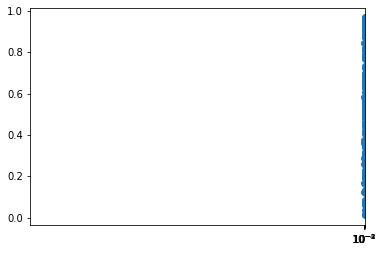

In [209]:
# Warning: the compunding order mattters!
fig, ax = plt.subplots()
ax.scatter(x=x, y=y) 
ax.set_xlim(0, 0.5)
ax.set_xscale('log')
# ax.get_figure()

[(0.0, 0.5), None]

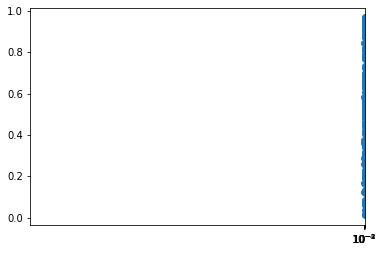

In [210]:
# Same with .set() syntax.
fig, ax = plt.subplots()
ax.scatter(x=x, y=y) 
ax.set(xlim=(0, 0.5), xscale='log')
# ax.get_figure()

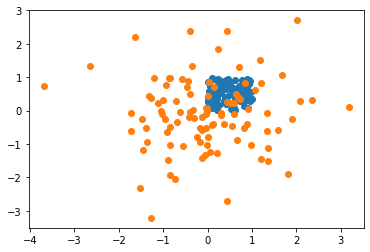

In [211]:
## Adding points
fig, ax = plt.subplots()
ax.scatter(x=x, y=y) 
ax.scatter(x=np.random.randn(n), y=np.random.randn(n)) 
# ax.get_figure()

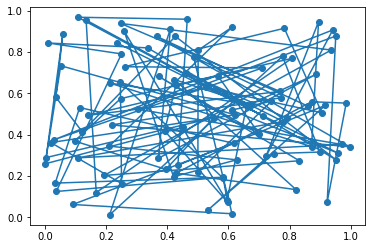

In [212]:
## Add line 
fig, ax = plt.subplots()
ax.scatter(x=x, y=y)
ax.plot(x, y)

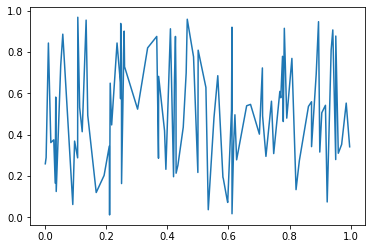

In [213]:
# Add line that makes some sense
fig, ax = plt.subplots()
ord = np.argsort(x.squeeze())
ax.plot(x[ord], y[ord])
# ax.get_figure()

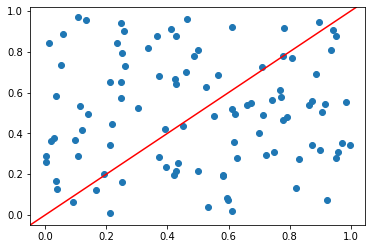

In [214]:
## Add abline
fig, ax = plt.subplots()
ax.scatter(x=x, y=y)
ax.axline(xy1=(0, 0), slope=1., color='red')
# ax.get_figure()

In [215]:
## Exporting
ax.get_figure().savefig("scatter.pdf")

## Pandas Matplotlib Backend


<AxesSubplot:xlabel='x', ylabel='y'>

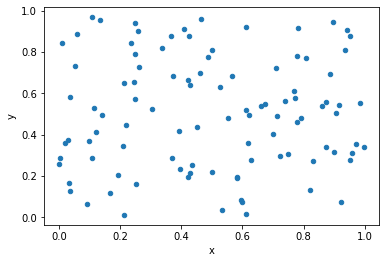

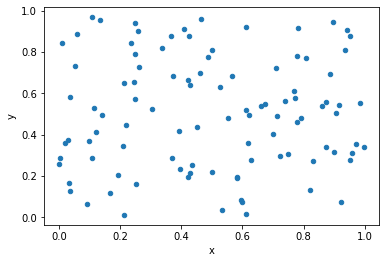

In [216]:
# pd.options.plotting.backend = 'matplotlib' # This is the default
data_frame.plot.scatter(x='x', y='y')
data_frame.plot(kind='scatter', x='x', y='y') 


matplotlib.axes._subplots.AxesSubplot

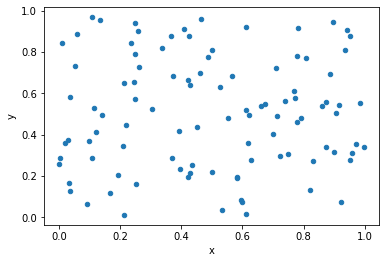

In [217]:
# Or save it as ax for further manipulation
ax = data_frame.plot.scatter(x='x', y='y')
type(ax)
# An Axes bject is returned

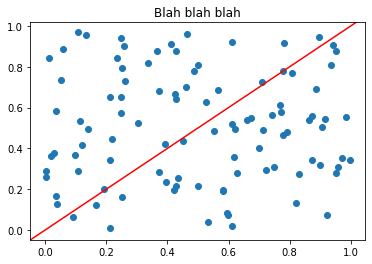

In [218]:
ax.set_title("Blah blah blah")
ax.get_figure()

<AxesSubplot:xlabel='x', ylabel='y'>

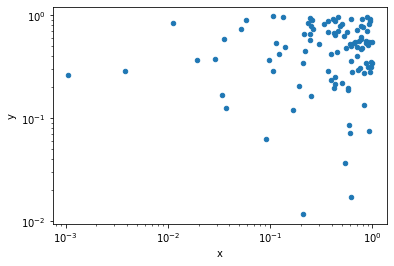

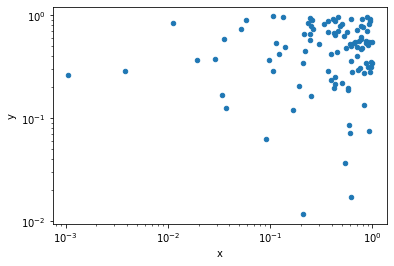

In [219]:
## The Pandas matplotlib backend has takes different parameters than matplotlib!
# Eg, Log scaling:
data_frame.plot.scatter(x='x', y='y', logx=True, logy=True) # will work
data_frame.plot(kind='scatter', x='x', y='y', logx=True, logy=True) # will work 

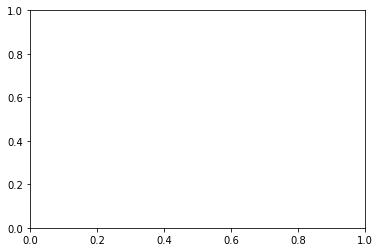

In [220]:
fig, ax = plt.subplots()
# ax.scatter(x=x, y=y, logx=True, logy=True) # will not work


## DaskFrames Backend

In [ ]:
data_dask = dd.from_pandas(data_frame, npartitions=1)
# data_dask.plot.scatter(x='x', y='y') # nahhh. no sch thing

# Seaborn

<AxesSubplot:>

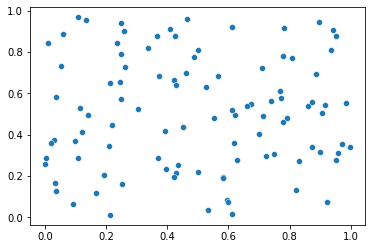

In [221]:
## Scatter of two 1D arrays
# sns.scatterplot(x=x, y=y) # Will not run

# Note:
# 1. The function is scatterplot() and not scatter() like matplotlib and plotly
# 2. The input is expected to be 1D arrays (i.e., squeeze)

x.shape
x = x.squeeze()
x.shape
y = y.squeeze()
z = z.squeeze()
cat = cat.squeeze()

sns.scatterplot(x=x, y=y) 



matplotlib.axes._subplots.AxesSubplot

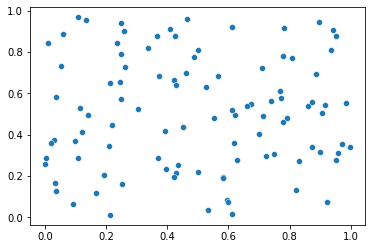

In [222]:
thing = sns.scatterplot(x=x, y=y);
type(thing) # an Axes object is returned. 

<AxesSubplot:>

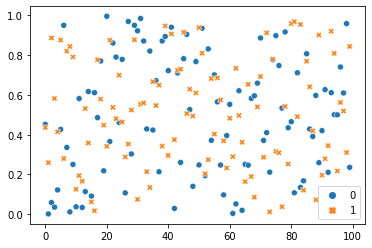

In [223]:
## Scatter of numpy array
sns.scatterplot(data = data_array)
# Not what you expected!
# Use pandas DataFrame instead of np.array

<AxesSubplot:xlabel='x', ylabel='y'>

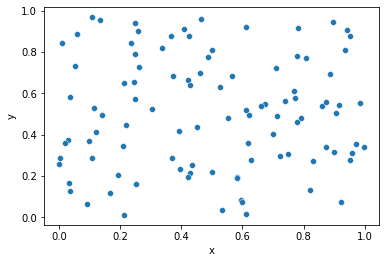

In [224]:
## Scatter of a Pandas DataFrame 
sns.scatterplot(data = data_frame, x = 'x', y = 'y')

Text(0.5, 1.0, 'Blah blah blah')

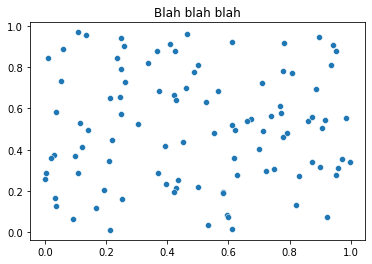

In [225]:
## Set titles 
# Recall seaborn returns an Axes object
sns.scatterplot(x=x, y=y).set_title("Blah blah blah")

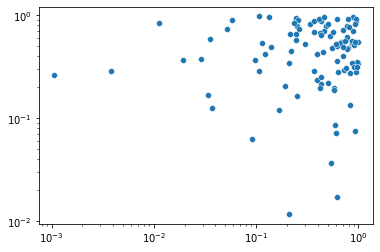

In [226]:
## Log scale
# Do not confuse with log transform
ax = sns.scatterplot(x=x, y=y).set(xscale='log', yscale='log')

<AxesSubplot:>

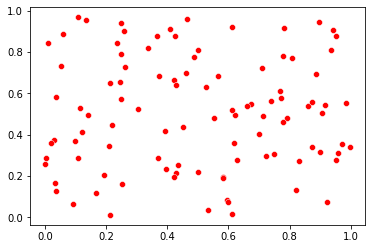

In [227]:
## Color markers
sns.scatterplot(x=x, y=y, color='red') # will work
# sns.scatterplot(x=x, y=y, hue='red') # will not work

<AxesSubplot:>

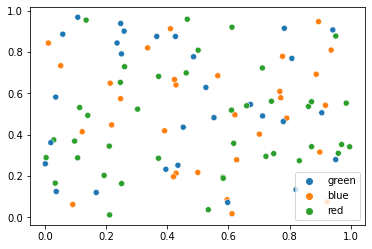

In [228]:
## Color markers along categorical variable 
colors = np.random.choice(['red', 'green', 'blue'], n)
# sns.scatterplot(x=x, y=y, color=colors) 
sns.scatterplot(x=x, y=y, hue=colors) 
# Note: 
# 1. Much easier than matplotlib.
# 2. color= for fixed color. hue= for variable. 
# 3. hue= is very specific to seaborn. Does not appear elsewhere.

<AxesSubplot:>

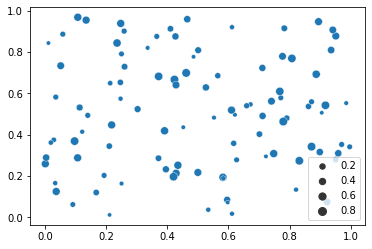

In [229]:
## Scale markers along numerical variable
sns.scatterplot(x=x, y=y, size=z)
# Much easier than matplotlib.

<AxesSubplot:>

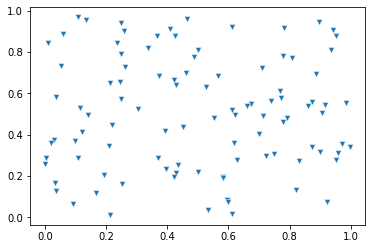

In [230]:
## Setting markers 
sns.scatterplot(x=x, y=y, marker='v') # will work
# sns.scatterplot(x=x, y=y, style='v') # will not work

<AxesSubplot:>

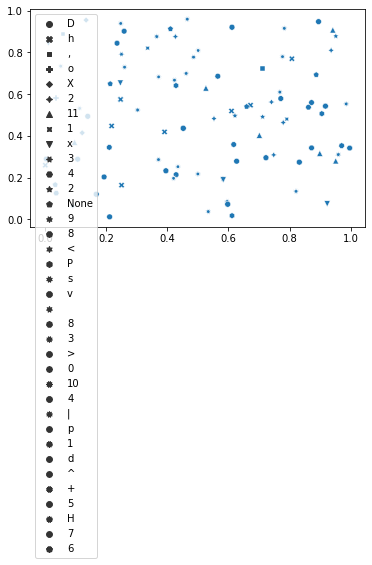

In [231]:
## Setting markers along categorical variable
marker = np.random.choice(list(Line2D.markers.keys()), n)
# sns.scatterplot(x=x, y=y, marker=marker) # will not work
sns.scatterplot(x=x, y=y, style=marker) # will work

[(0.0, 0.5), (0.0, 0.5)]

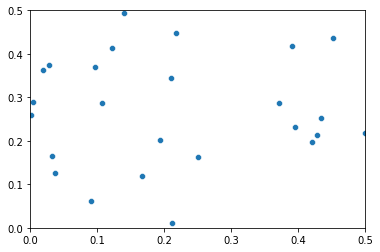

In [232]:
## Setting axis limits
sns.scatterplot(x=x, y=y).set(xlim=(0, 0.5), ylim=(0, 0.5))



[(0.0, 0.5), None]

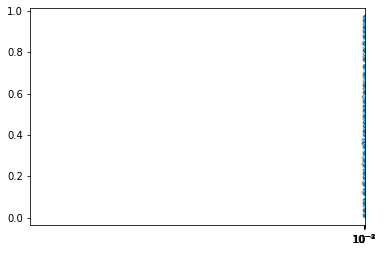

In [233]:
# Compounding axes operations (order still matters)
sns.scatterplot(x=x, y=y).set(xlim=(0, 0.5), xscale='log') # will not work


/var/folders/_r/wy12vfvn5tl4x489t0smqbkm0000gn/T/ipykernel_10202/1864023966.py:1: UserWarning:

Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.



[None, (0.0007484507734608961, 0.5)]

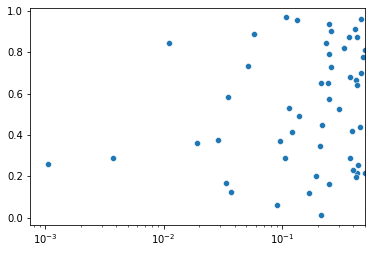

In [234]:
sns.scatterplot(x=x, y=y).set(xscale='log',xlim=(0, 0.5)) # will work


## Faceting


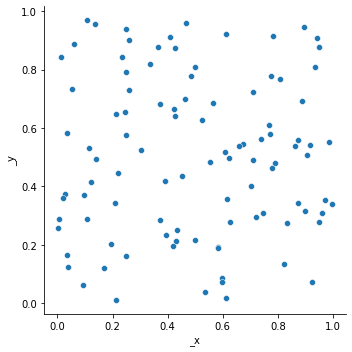

In [235]:
## Faceted scatterplot along categorical variable
sns.relplot(x=x, y=y, col=cat) # will now work. Not even an error!


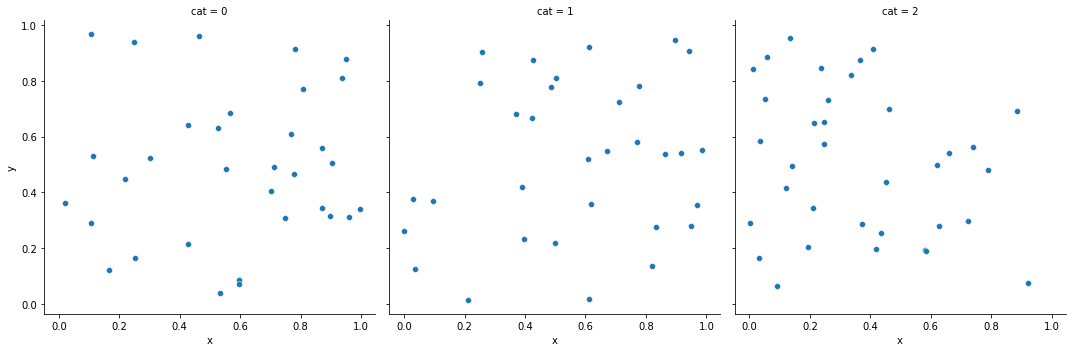

In [236]:
sns.relplot(data=data_frame, x='x', y='y', col='cat') # will work
# Note:
# sns.relplot() instead of sns.scatterplot()
# reltplot() works with Pandas DataFrames, not standalone vectors
# Do not confuse col= with color= 



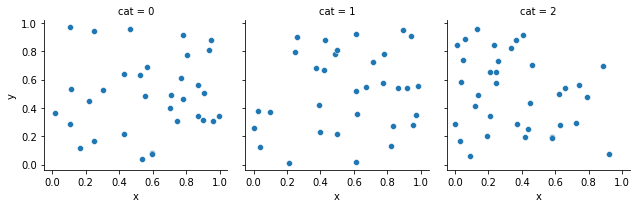

In [237]:
## The more general FacetGrid
# Make facet
g = sns.FacetGrid(data_frame, col='cat')
# Map plot:
# g.map(sns.scatterplot, x='x', y='y') # will not work
g.map(sns.scatterplot, 'x', 'y') # will work


In [238]:
# g.get_figure() # will not work. 
type(g) # g is not(!) an Axes object.


seaborn.axisgrid.FacetGrid

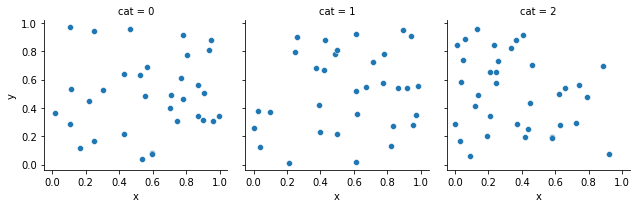

In [239]:
type(g.figure) # You can get the figure object.
g.figure



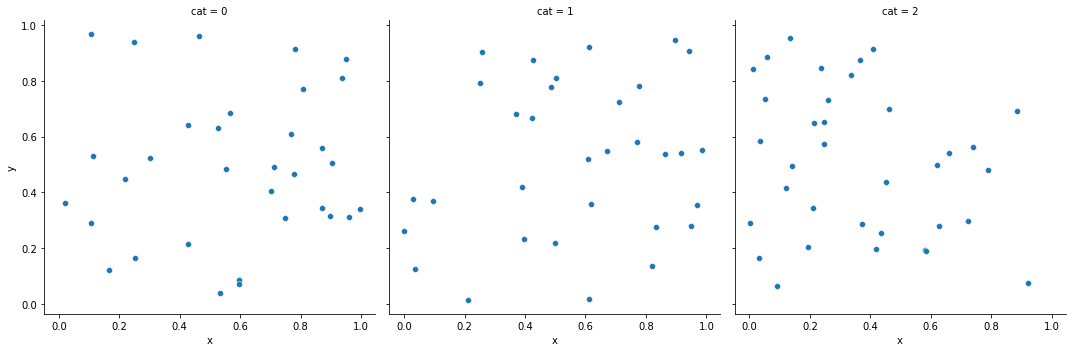

Type:           FacetGrid
String form:    <seaborn.axisgrid.FacetGrid object at 0x7fbe97cd8820>
File:           /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py
Docstring:      Multi-plot grid for plotting conditional relationships.
Init docstring:
Initialize the matplotlib figure and FacetGrid object.

This class maps a dataset onto multiple axes arrayed in a grid of rows
and columns that correspond to *levels* of variables in the dataset.
The plots it produces are often called "lattice", "trellis", or
"small-multiple" graphics.

It can also represent levels of a third variable with the ``hue``
parameter, which plots different subsets of data in different colors.
This uses color to resolve elements on a third dimension, but only
draws subsets on top of each other and will not tailor the ``hue``
parameter for the specific visualization the way that axes-level
functions that accept ``hue`` will.

The basic workflow is to initialize the :c

In [240]:
g = sns.relplot(data=data_frame, x='x', y='y', col='cat') 
type(g)
g?



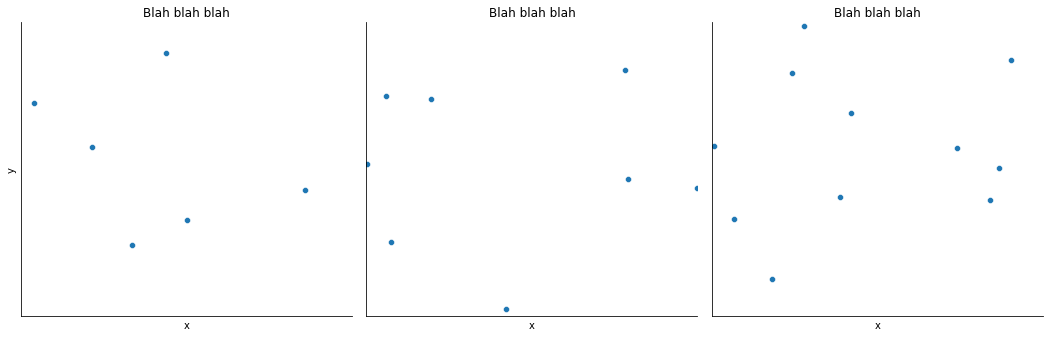

In [241]:
## Iterate over axes in a FacetGrid:
for ax in g.axes.flat:
    ax.set_xlim(0, 0.5)
    ax.set_ylim(0, 0.5)
    ax.set(xticks=[], yticks=[])
    ax.set_title("Blah blah blah")
g.figure



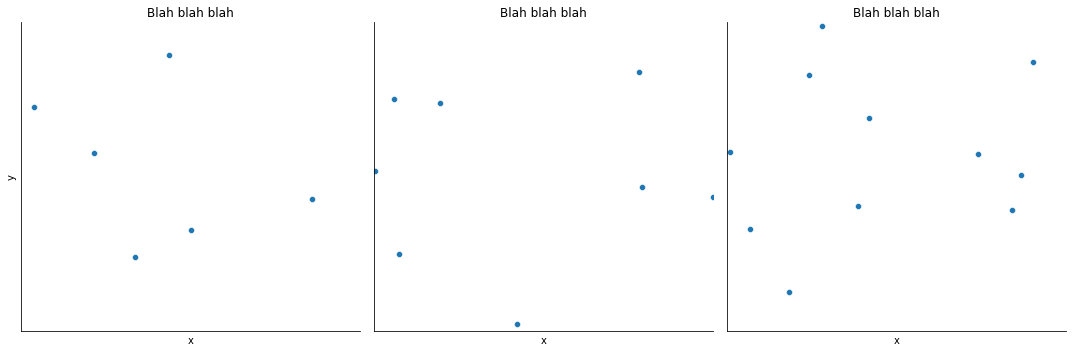

In [242]:
## Arrange Layout
g.tight_layout()
g.figure

# Plotly Express

In [243]:
# %pip install --upgrade nbformat

In [244]:
## Scatter of two 1D arrays
x.shape
x = x.squeeze()
x.shape
y = y.squeeze()
z = z.squeeze()
cat = cat.squeeze()

px.scatter(x=x, y=y) 
# Note: The output is interactive!!! You can zoom, hover, etc. 


In [245]:
thing = px.scatter(x=x, y=y) 
type(thing) 
# Note: a plotly Graph-Object is returned. Not manipulable like matplotlib Axes. Thsi means that all options are either:
# (1) Set within the function call. 
# (2) Set using GraphObject options. 



plotly.graph_objs._figure.Figure

In [246]:
## Scatter of numpy array
px.scatter(data_frame = data_array)
# Note:
# 1. Data parameter is data_frame= not data= like matplotlib and seaborn.
# 2. Not the scatterplot we were expecting. Use pandas DataFrame instead of np.array


In [247]:
## Scatter of a Pandas DataFrame 
px.scatter(data_frame = data_frame, x = 'x', y = 'y')


In [248]:
## Set titles 
px.scatter(x=x, y=y, title="Blah blah blah")


In [249]:
## Log scale
# Do not confuse with log transform
px.scatter(x=x, y=y, log_x=True, log_y=True)



In [250]:
## Color markers
px.scatter(x=x, y=y, color=cat) # continous scale


In [251]:
px.scatter(x=x, y=y, color=cat.astype(str)) # discrete scale


In [252]:
# px.scatter(x=x, y=y, color='red') # will not work


In [253]:
## Scale markers along numerical variable
px.scatter(x=x, y=y, size=z)


In [254]:
## Setting markers 
px.scatter(x=x, y=y, symbol=cat) # will work
# px.scatter(x=x, y=y, marker='v') # will not work
# px.scatter(x=x, y=y, style='v') # will not work


In [255]:
## Setting axis limits
# px.scatter(x=x, y=y, xlim=(0, 0.5), ylim=(0, 0.5)) # will not work
px.scatter(x=x, y=y, range_x=[0, 0.5], range_y=[0, 0.5]) # will work


In [256]:
## Compounding axes operations (order still matters)
# px.scatter(x=x, y=y, log_x=True, range_x=(0, 0.5)) # cannot include 0
px.scatter(x=x, y=y, log_x=True, range_x=(0.01, 0.5)) # will work


In [257]:
px.scatter(x=x, y=y, range_x=(0.01, 0.5), log_x=True) # order does not matter


In [258]:
## Hovering
px.scatter(
    data_frame=data_frame, x='x', y='y', 
    hover_data=['x', 'y', 'z'])


In [259]:
px.scatter(
    data_frame=data_frame, x='x', y='y', 
    hover_data=['x', 'y', 'z'], hover_name='cat')


In [260]:
## Faceting

## Faceted scatterplot along categorical variable
px.scatter(x=x, y=y, facet_col=cat)


In [261]:
px.scatter(x=x, y=y, facet_row=cat)

In [262]:
px.scatter(x=x, y=y, facet_col=cat, facet_col_wrap=2)


In [263]:
fig = px.scatter(x=x, y=y, facet_col=cat, facet_col_wrap=2)
type(fig) # A faceted GraphObject, is just another GraphObject. 


plotly.graph_objs._figure.Figure

In [264]:
## Iterate over axes in a FacetGrid:
# TODO


In [265]:
## Export
fig.write_html("test.html")
# %pip install -U kaleido
# fig.write_image("test.png")


# Pandas Plotly backend

In [ ]:
pd.options.plotting.backend = "plotly"

# Is the syntax independent of the backend?

In [ ]:
## Pandas Matplotlib Backend

data_frame.plot.scatter(x='x', y='y')
data_frame.plot(kind='scatter', x='x', y='y') 

# This will no longer work
# ax = data_frame.plot.scatter(x='x', y='y')
# type(ax)
# ax.set_title("Blah blah blah")
# ax.get_figure()


## The pandas plotting parameters are backend dependent! 
## This is pure sadism
# Eg, Log scaling with matplotlib syntax:
# data_frame.plot.scatter(x='x', y='y', logx=True, logy=True) # will not work
# data_frame.plot(kind='scatter', x='x', y='y', logx=True, logy=True) # will not work 

## At least the plotly syntax works:
data_frame.plot(kind='scatter', x='x', y='y', log_x=True) 


# Plotly Graph Objects

In [ ]:
# See you in the advanced meeting :-)

# Holoviews


## Pandas Holoviews Backend


In [ ]:
pd.options.plotting.backend = 'hvplot'
# pd.set_option('plotting.backend', 'hvplot')

data_frame.plot.scatter(x='x', y='y')
data_frame.plot(kind='scatter', x='x', y='y') 

# Or save it as ax for further manipulation
ax = data_frame.plot.scatter(x='x', y='y')
type(ax)
 
 
 ## Holoview API seems to be more compatible with Pandas
# Eg, Log scaling:
data_frame.plot.scatter(x='x', y='y', logx=True, logy=True) # will work
data_frame.plot(kind='scatter', x='x', y='y', logx=True, logy=True) # will work 



# Bokeh

## Pandas Bokeh backend


In [ ]:

pd.options.plotting.backend = "pandas_bokeh"

data_frame.plot.scatter(x='x', y='y')
data_frame.plot(kind='scatter', x='x', y='y') 

# Or save it as ax for further manipulation
ax = data_frame.plot.scatter(x='x', y='y')
type(ax)
# An Axes bject is returned

## The Pandas matplotlib backend has takes different parameters than matplotlib!
# Eg, Log scaling:
data_frame.plot.scatter(x='x', y='y', logx=True, logy=True) # will work
data_frame.plot(kind='scatter', x='x', y='y', logx=True, logy=True) # will work 


In [ ]:
# Altair
# Seems to be a dead project

In [ ]:
## Altair Pandas backend

# pd.options.plotting.backend = "altair"

# data_frame.plot.scatter(x='x', y='y')
# data_frame.plot(kind='scatter', x='x', y='y') 
